In [607]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [570]:
pwd

'C:\\Users\\pc\\Downloads\\JanathaHack- Mobile Analytics'

In [608]:
# loading data train and test
train= pd.read_csv('train_Wc8LBpr.csv')
test= pd.read_csv('test_VsU9xXK.csv')

In [609]:
#making copy
train_original=train.copy() 
test_original=test.copy()

In [414]:
#column names
train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [415]:
test.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')

In [416]:
#train data dimensions
train.shape

(131662, 14)

In [417]:
#test data dimensions
test.shape

(87395, 13)

In [418]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [419]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [420]:
#Train data summary
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [421]:
#target variable levels
train['Surge_Pricing_Type'].value_counts()/train['Surge_Pricing_Type'].shape

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

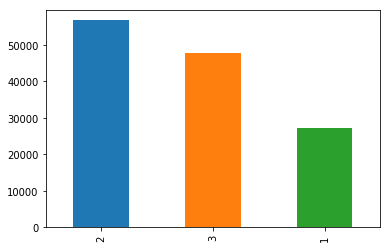

In [422]:
train['Surge_Pricing_Type'].value_counts().plot.bar()

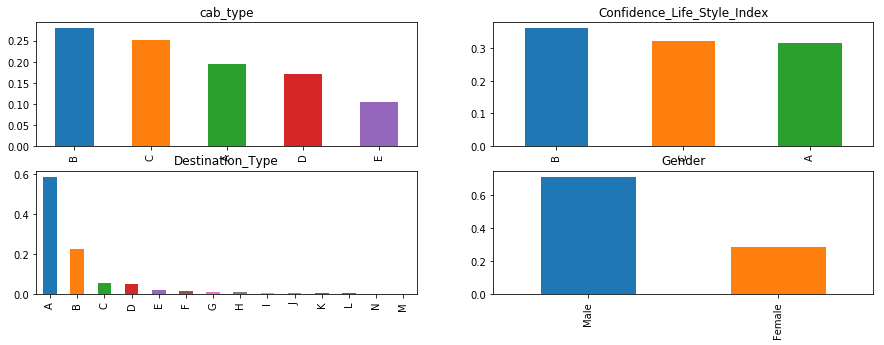

In [423]:
#Independent Variable (Categorical)

plt.figure(1) 
plt.subplot(221) 
train['Type_of_Cab'].value_counts(normalize=True).plot.bar(figsize=(15,5), title='cab_type') 
plt.subplot(222) 
train['Confidence_Life_Style_Index'].value_counts(normalize=True).plot.bar(title= 'Confidence_Life_Style_Index') 
plt.subplot(223) 
train['Destination_Type'].value_counts(normalize=True).plot.bar(title= 'Destination_Type') 
plt.subplot(224) 
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.show()

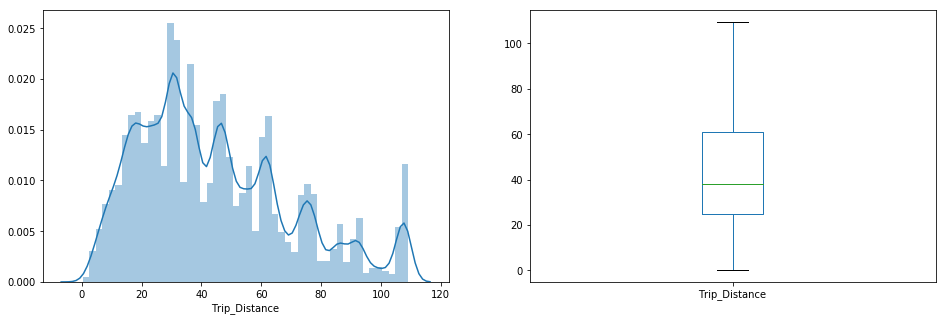

In [424]:
#Independent Variable (Numerical)

plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Trip_Distance']); 
plt.subplot(122) 
train['Trip_Distance'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

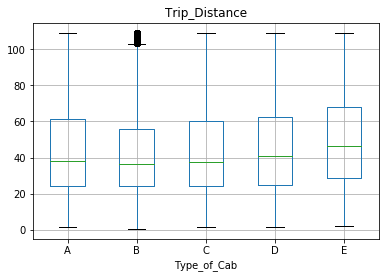

In [425]:
train.boxplot(column='Trip_Distance', by = 'Type_of_Cab') 
plt.suptitle("")

In [426]:
#plt.figure(1) 
#plt.subplot(121) 
#sns.distplot(train['Customer_Since_Months'].dropna()); 
#plt.subplot(122) 
#train['Customer_Since_Months'].dropna().plot.box(figsize=(16,5)) 
#plt.show()

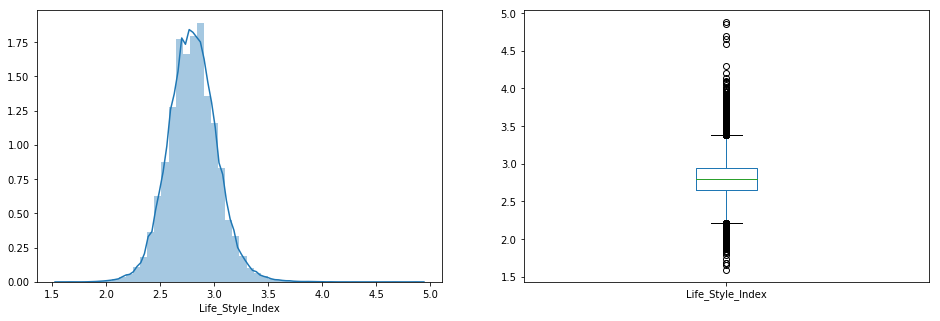

In [427]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(train['Life_Style_Index'].dropna()); 
plt.subplot(122) 
train['Life_Style_Index'].dropna().plot.box(figsize=(16,5)) 
plt.show()

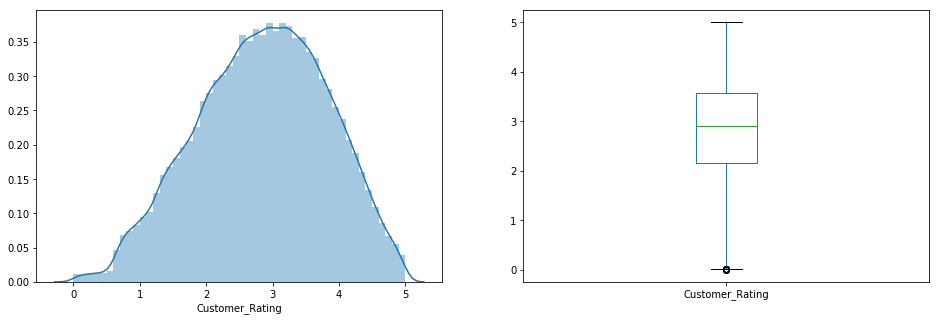

In [428]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Customer_Rating']); 
plt.subplot(122) 
train['Customer_Rating'].plot.box(figsize=(16,5)) 
plt.show()

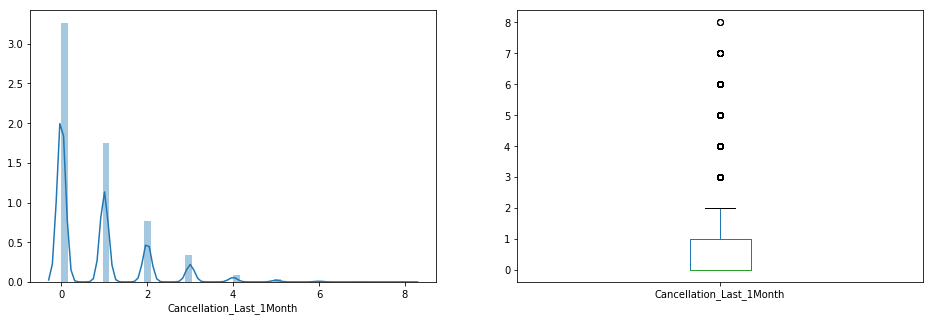

In [429]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Cancellation_Last_1Month']); 
plt.subplot(122) 
train['Cancellation_Last_1Month'].plot.box(figsize=(16,5)) 
plt.show()

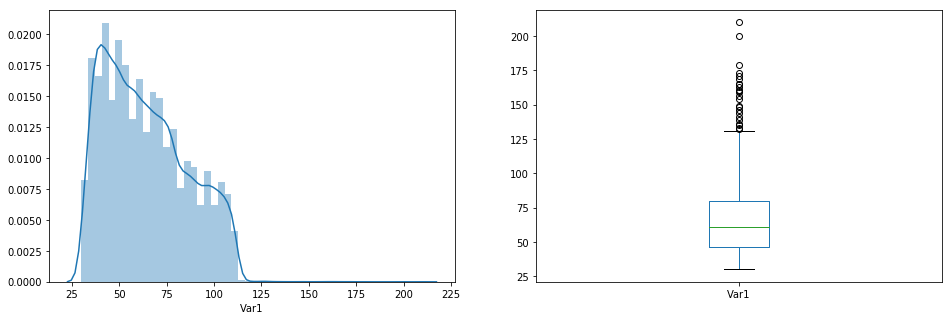

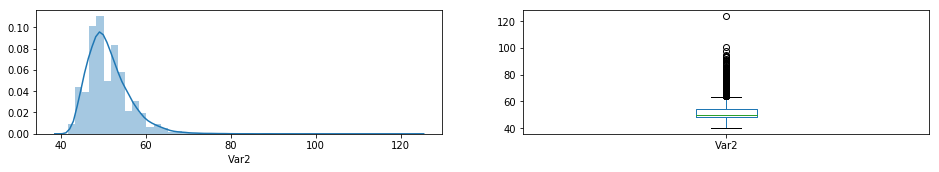

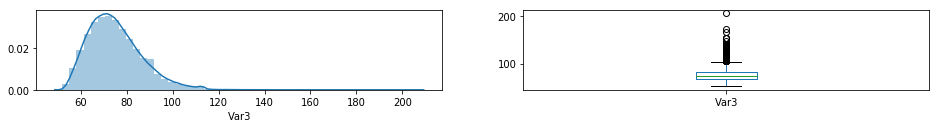

In [430]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['Var1'].dropna()); 
plt.subplot(122) 
train['Var1'].dropna().plot.box(figsize=(16,5)) 
plt.show()
plt.subplot(221) 
sns.distplot(train['Var2']); 
plt.subplot(222) 
train['Var2'].plot.box(figsize=(16,5)) 
plt.show()
plt.subplot(321) 
sns.distplot(train['Var3']); 
plt.subplot(322) 
train['Var3'].plot.box(figsize=(16,5)) 
plt.show()

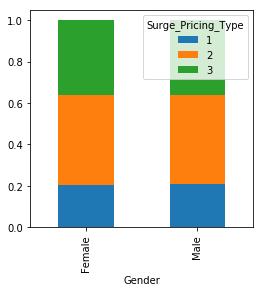

In [431]:
#Categorical Independent Variable vs Target Variable

Gender=pd.crosstab(train['Gender'],train['Surge_Pricing_Type'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

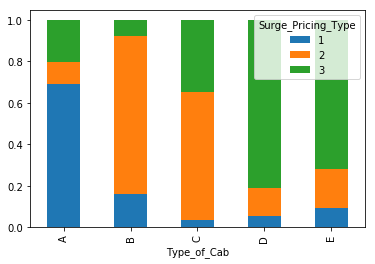

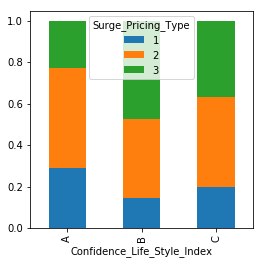

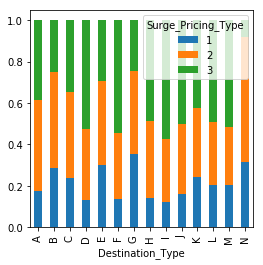

In [432]:
Type_of_Cab=pd.crosstab(train['Type_of_Cab'],train['Surge_Pricing_Type']) 
Confidence_Life_Style_Index=pd.crosstab(train['Confidence_Life_Style_Index'],train['Surge_Pricing_Type']) 
Destination_Type=pd.crosstab(train['Destination_Type'],train['Surge_Pricing_Type']) 
plt.show() 
Type_of_Cab.div(Type_of_Cab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Confidence_Life_Style_Index.div(Confidence_Life_Style_Index.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Destination_Type.div(Destination_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

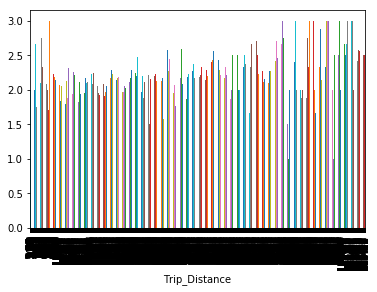

In [433]:
#Numerical Independent Variable vs Target Variable

train.groupby('Trip_Distance')['Surge_Pricing_Type'].mean().plot.bar()

In [610]:
#missing value treatment
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [611]:
#missing value treatment for train data
train['Type_of_Cab'].fillna(train['Type_of_Cab'].mode()[0], inplace=True) 
train['Customer_Since_Months'].fillna(train['Customer_Since_Months'].mode()[0], inplace=True) 
train['Life_Style_Index'].fillna(train['Life_Style_Index'].mode()[0], inplace=True) 
train['Confidence_Life_Style_Index'].fillna(train['Confidence_Life_Style_Index'].mode()[0], inplace=True) 
train['Var1'].fillna(train['Var1'].mode()[0], inplace=True)

In [612]:
#missing value treatment for test data
test['Type_of_Cab'].fillna(test['Type_of_Cab'].mode()[0], inplace=True) 
test['Customer_Since_Months'].fillna(test['Customer_Since_Months'].mode()[0], inplace=True) 
test['Life_Style_Index'].fillna(test['Life_Style_Index'].mode()[0], inplace=True) 
test['Confidence_Life_Style_Index'].fillna(test['Confidence_Life_Style_Index'].mode()[0], inplace=True) 
test['Var1'].fillna(test['Var1'].mode()[0], inplace=True)

In [613]:
#Combinning Var2,3 to one variable
train['Var123']= train['Var1']+train['Var2']+train['Var3']
test['Var123']= test['Var1']+test['Var2']+test['Var3']


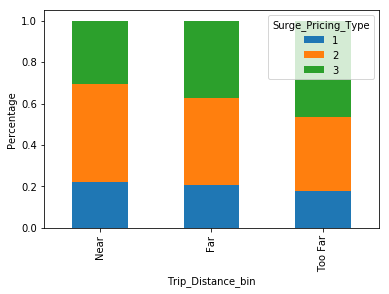

In [614]:
#creating bins for trip_distance
bins=[0,40,60,120] 
group=['Near','Far', 'Too Far'] 
train['Trip_Distance_bin']=pd.cut(train['Trip_Distance'],bins,labels=group)
test['Trip_Distance_bin']=pd.cut(test['Trip_Distance'],bins,labels=group)
Trip_Distance_bin=pd.crosstab(train['Trip_Distance_bin'],train['Surge_Pricing_Type']) 
Trip_Distance_bin.div(Trip_Distance_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Trip_Distance_bin') 
P = plt.ylabel('Percentage')

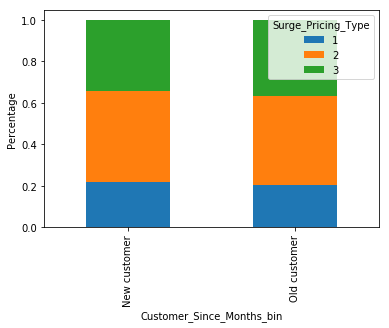

In [615]:
#Creating bins for Customer_Since_Months
bins=[0,1,10]
group=['New customer','Old customer']
train['Customer_Since_Months_bin']= pd.cut(train['Customer_Since_Months'],bins,labels=group)
test['Customer_Since_Months_bin']= pd.cut(test['Customer_Since_Months'],bins,labels=group)
Customer_Since_Months_bin=pd.crosstab(train['Customer_Since_Months_bin'],train['Surge_Pricing_Type'])
Customer_Since_Months_bin.div(Customer_Since_Months_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Customer_Since_Months_bin') 
P = plt.ylabel('Percentage')

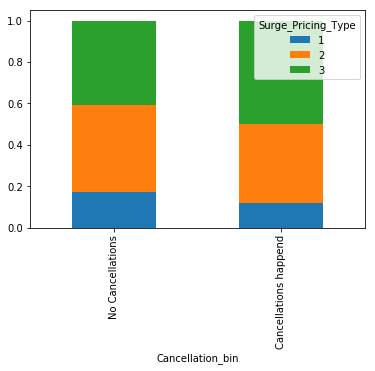

In [616]:
#Creating bins for cancellations
bins=[0,1,8]
group=['No Cancellations','Cancellations happend']
train['Cancellation_bin']= pd.cut(train['Cancellation_Last_1Month'],bins,labels=group)
test['Cancellation_bin']= pd.cut(test['Cancellation_Last_1Month'],bins,labels=group)
Cancellation_bin= pd.crosstab(train['Cancellation_bin'],train['Surge_Pricing_Type'])
Cancellation_bin.div(Cancellation_bin.sum(1),axis=0).plot(kind="bar", stacked=True)

In [617]:
#drop where bins created
train=train.drop(['Var123','Customer_Since_Months_bin','Cancellation_bin','Trip_Distance_bin'], axis=1)
test=test.drop(['Var123','Customer_Since_Months_bin','Cancellation_bin','Trip_Distance_bin'], axis=1)

In [618]:
test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [619]:
#Dorpping Trip_ID from calculations
train= train.drop('Trip_ID',axis=1) 
test= test.drop('Trip_ID',axis=1)

In [620]:
#target variable
X = train.drop('Surge_Pricing_Type',1) 
y = train.Surge_Pricing_Type

In [621]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [628]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.2)

In [629]:
#logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [630]:
#prediction for validation set
pred_cv = model.predict(x_cv)

In [631]:
accuracy_score(y_cv,pred_cv)

0.6779706072228763

In [502]:
#test prediction
pred_test = model.predict(test)

In [503]:
submission=pd.read_csv("sample_submission_NoPBkjr.csv")

In [504]:
submission['Surge_Pricing_Type']=pred_test 
submission['Trip_ID']=test_original['Trip_ID']

In [505]:
#writing csv file
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('logistic.csv')

In [508]:
#using K-fold cross validation approach for validation of our model fitness
from sklearn.model_selection import StratifiedKFold

In [632]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6804769680628868

2 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6820339497968329

3 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6777427562374208

4 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6791356524380981

5 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6774904105427063


In [633]:
#roc curve
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

ValueError: multiclass format is not supported

In [ ]:
submission['Surge_Pricing_Type']=pred_test 
submission['Trip_ID']=test_original['Trip_ID']

In [ ]:
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('Logistic.csv')

In [82]:
#Featuring
#creating total income feature

In [580]:
#Removing variables used for feature creation
#train=train.drop([,'Var1','Var2','Var3',,], axis=1)
train=train.drop(['Var1','Var2','Var3','Customer_Since_Months','Cancellation_Last_1Month','Trip_Distance'], axis=1)
test=test.drop(['Var1','Var2','Var3','Customer_Since_Months','Cancellation_Last_1Month','Trip_Distance'], axis=1)

In [583]:
#Dorpping Trip_ID from calculations
train= train.drop('Trip_ID',axis=1) 
test= test.drop('Trip_ID',axis=1)

In [586]:
train.dtypes

Type_of_Cab                      object
Life_Style_Index                float64
Confidence_Life_Style_Index      object
Destination_Type                 object
Customer_Rating                 float64
Gender                           object
Surge_Pricing_Type                int64
Var123                          float64
Trip_Distance_bin              category
Customer_Since_Months_bin      category
Cancellation_bin               category
dtype: object

In [587]:
#target variable
X = train.drop('Surge_Pricing_Type',1) 
y = train.Surge_Pricing_Type
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [588]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
#using K-fold cross validation approach for validation of our model fitness
from sklearn.model_selection import StratifiedKFold

In [589]:
#logistic regression after creating new features
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6791098621501538

2 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6778946568943911

3 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6772490791022672

4 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6783381437034787

5 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy_score 0.6748319471345562


In [590]:
submission['Surge_Pricing_Type']=pred_test             
submission['Trip_ID']=test_original['Trip_ID'] 
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('Log2.csv')

In [ ]:
# Decision tree algorithm
from sklearn import tree

In [634]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.5594880947860099

2 of kfold 5
accuracy_score 0.5556146280332662

3 of kfold 5
accuracy_score 0.5582349143660046

4 of kfold 5
accuracy_score 0.561104359714416

5 of kfold 5
accuracy_score 0.5602901522919752


In [593]:
submission['Surge_Pricing_Type']=pred_test             
submission['Trip_ID']=test_original['Trip_ID'] 
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('DecisionTree.csv')

In [594]:
# RandomForest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [635]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6844643603083583

2 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.683401055709566

3 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6813124216762237

4 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6830852195047851

5 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.678895598344157


In [636]:
submission['Surge_Pricing_Type']=pred_test             
submission['Trip_ID']=test_original['Trip_ID'] 
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('RF.csv')

In [637]:
#We will try to improve the accuracy by tuning the hyperparameters for this model. 
#We will use grid search to get the optimized values of hyper parameters. 
#Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters
from sklearn.model_selection import GridSearchCV

In [638]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

# Fit the grid search model 
grid_search.fit(x_train,y_train)

# Estimating the optimized value 
grid_search.best_estimator_

C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=181, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [639]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test)


1 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6844643603083583

2 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.683401055709566

3 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6813124216762237

4 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.6830852195047851

5 of kfold 5


C:\Users\Vnreddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy_score 0.678895598344157


In [640]:
submission['Surge_Pricing_Type']=pred_test             
submission['Trip_ID']=test_original['Trip_ID'] 
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Trip_ID','Surge_Pricing_Type']).to_csv('RF_Grid.csv')

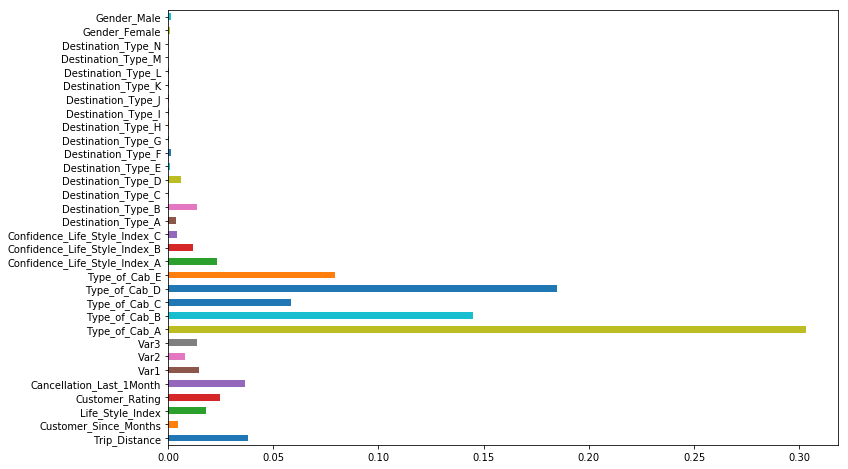

In [641]:
#Let us find the feature importance now, i.e. which features are most important for this problem. 
#We will use feature_importances_ attribute of sklearn to do so.

importances=pd.Series(model.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [642]:
#XGBOOST  algorithm
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [114]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    pred_test = model.predict(test) 
    pred3=model.predict_proba(test)[:,1]


1 of kfold 5


NameError: name 'XGBClassifier' is not defined

In [113]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')